In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# load the dataset
iris = datasets.load_iris()
X=iris.data # features
y=iris.target # target variable

# split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# standardize the features (which is important for models like SVM and KNN)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # computes the mean an standard deviation from the training data and scales the data accordingly.
X_test=scaler.transform(X_test) # applies the same scaling to X_test that was learned from X_train. the fit method is not called again onX_test because we want to use the same scaling parameters (mean and standard deviation) learned from the training data.

In [3]:
# Classifiers
svm=SVC(kernel='linear',random_state=42)
knn=KNeighborsClassifier(n_neighbors=5)
dt=DecisionTreeClassifier(random_state=42)

In [4]:
# fit the mdoels to the training data
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
# predict using the trained models

svm_pred=svm.predict(X_test)
knn_pred=knn.predict(X_test)
dt_pred=dt.predict(X_test)


In [6]:
# evaluate the models
svm_accuracy=accuracy_score(y_test,svm_pred)
knn_accuracy=accuracy_score(y_test,knn_pred)
dt_accuracy=accuracy_score(y_test,dt_pred)

# print the results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f} %")
print(f"KNN Accuracy: {knn_accuracy *100:.2f} %")
print(f" Decision Tree Accuracy:{dt_accuracy *100:.2f} % ")


SVM Accuracy: 96.67 %
KNN Accuracy: 100.00 %
 Decision Tree Accuracy:100.00 % 


In [9]:
# print the  classification report
print("\nSVM Classification Report:\n",classification_report(y_test,svm_pred))
print("\nKNN Classification Report: \n",classification_report(y_test,knn_pred))
print("\nDecision Tree Classification Report: \n",classification_report(y_test,dt_pred))



SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


KNN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1


SVM Confusion Matrix: 
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


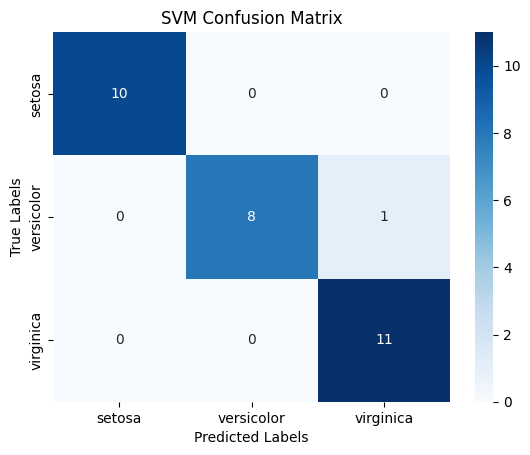

In [13]:
# print confusion matrices
print("\nSVM Confusion Matrix: ")
svm_cm=confusion_matrix(y_test,svm_pred)
print(svm_cm)
sns.heatmap(svm_cm,annot=True,fmt='d',cmap="Blues",xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


KNN Confusion Matrix:


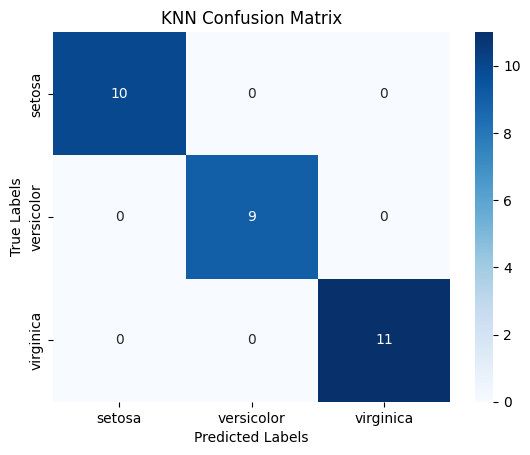

In [14]:
print("\nKNN Confusion Matrix:")
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Decision Tree Confusion Matrix:


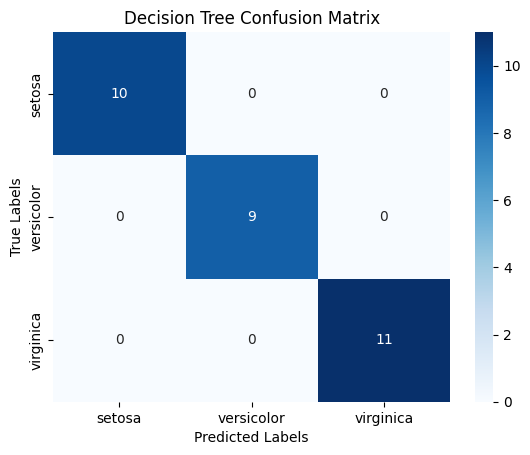

In [15]:
print("\nDecision Tree Confusion Matrix:")
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()